# Sentinel data

![](https://www.defensa.com/foto-articulo-fichero_22889_20200623.jpg,800,700,0.jpg)

In [14]:
import sys
import os

In [1]:
import folium
import geopandas as gpd
from sentinelsat.sentinel import SentinelAPI
import rasterio 
import matplotlib.pyplot as plt
from rasterio import plot
from rasterio.plot import show
from rasterio.mask import mask

https://old-monk.medium.com/a-precise-guide-to-investigate-sentinel-2-data-in-python-downloading-visualizing-2cc8d9d60021

In [2]:
from osgeo import gdal

ModuleNotFoundError: No module named 'osgeo'

### Pamplona

In [4]:
name='pamplona'
latitude=42.81349804717014
longitude=-1.6453010275390108
zoom=13

In [5]:
print(f'http://geojson.io/#map={zoom}/{latitude}/{longitude}')

http://geojson.io/#map=13/42.81349804717014/-1.6453010275390108


In [7]:
m = folium.Map([latitude, longitude], zoom_start=zoom)
boundary = gpd.read_file(f'../data/geo/{name}.geojson')
folium.GeoJson(boundary).add_to(m)
m

### Create a footprint of the region and generate a query.

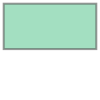

In [8]:
footprint = boundary['geometry'][0]
footprint

## Download data

In [9]:
dates = ('20230601', '20210615')

In [11]:
from dotenv import load_dotenv

In [13]:
load_dotenv()

True

In [16]:
user = os.environ['COPERNICUS_USER']
password = os.environ['COPERNICUS_PASSWORD']

In [17]:
api_url = 'https://scihub.copernicus.eu/dhus'

In [18]:
api = SentinelAPI(user, password, api_url) 

In [32]:
dates = ('20230101', '20230610')

In [33]:
products = api.query(footprint,
                     date = dates,
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                     cloudcoverpercentage = (0, 10))

In [34]:
gdf = api.to_geodataframe(products)
gdf

,title,link,link_alternative,link_icon,summary,ondemand,generationdate,beginposition,endposition,ingestiondate,...,producttype,platformidentifier,orbitdirection,platformserialidentifier,processinglevel,datastripidentifier,granuleidentifier,identifier,uuid,geometry
7da18c4b-4ce2-42e7-8ace-776f53420230,S2A_MSIL2A_20230408T105621_N0509_R094_T30TXN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-04-08T10:56:21.024Z, Instrument: MS...",false,2023-04-08 17:08:54,2023-04-08 10:56:21.024,2023-04-08 10:56:21.024,2023-04-08 18:58:46.845,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230408T170854_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230408T170854_A0407...,S2A_MSIL2A_20230408T105621_N0509_R094_T30TXN_2...,7da18c4b-4ce2-42e7-8ace-776f53420230,"MULTIPOLYGON (((-0.45337 42.33578, -0.41248 43..."
1391f05d-ecc4-40d6-8b42-0641479683a7,S2A_MSIL2A_20230217T110121_N0509_R094_T30TWN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-02-17T11:01:21.024Z, Instrument: MS...",false,2023-02-17 17:04:59,2023-02-17 11:01:21.024,2023-02-17 11:01:21.024,2023-02-17 19:00:44.445,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230217T170459_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230217T170459_A0399...,S2A_MSIL2A_20230217T110121_N0509_R094_T30TWN_2...,1391f05d-ecc4-40d6-8b42-0641479683a7,"MULTIPOLYGON (((-1.66699 42.35632, -1.64554 43..."
a3cece7a-6b25-4203-9897-48b974e5a414,S2A_MSIL2A_20230217T110121_N0509_R094_T30TXN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-02-17T11:01:21.024Z, Instrument: MS...",false,2023-02-17 17:04:59,2023-02-17 11:01:21.024,2023-02-17 11:01:21.024,2023-02-17 18:52:19.674,...,S2MSI2A,2015-028A,DESCENDING,Sentinel-2A,Level-2A,S2A_OPER_MSI_L2A_DS_2APS_20230217T170459_S2023...,S2A_OPER_MSI_L2A_TL_2APS_20230217T170459_A0399...,S2A_MSIL2A_20230217T110121_N0509_R094_T30TXN_2...,a3cece7a-6b25-4203-9897-48b974e5a414,"MULTIPOLYGON (((-0.45337 42.33578, -0.41248 43..."
967c8759-80c3-48a9-adef-cbce8611cab8,S2B_MSIL2A_20230212T110059_N0509_R094_T30TXN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-02-12T11:00:59.024Z, Instrument: MS...",false,2023-02-12 13:54:11,2023-02-12 11:00:59.024,2023-02-12 11:00:59.024,2023-02-12 16:27:39.852,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20230212T135411_S2023...,S2B_OPER_MSI_L2A_TL_2BPS_20230212T135411_A0310...,S2B_MSIL2A_20230212T110059_N0509_R094_T30TXN_2...,967c8759-80c3-48a9-adef-cbce8611cab8,"MULTIPOLYGON (((-0.45337 42.33578, -0.41248 43..."
629f4e9b-0dda-4992-ac6e-c0262e28c10e,S2B_MSIL2A_20230212T110059_N0509_R094_T30TWN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-02-12T11:00:59.024Z, Instrument: MS...",false,2023-02-12 13:54:11,2023-02-12 11:00:59.024,2023-02-12 11:00:59.024,2023-02-12 16:15:44.728,...,S2MSI2A,2017-013A,DESCENDING,Sentinel-2B,Level-2A,S2B_OPER_MSI_L2A_DS_2BPS_20230212T135411_S2023...,S2B_OPER_MSI_L2A_TL_2BPS_20230212T135411_A0310...,S2B_MSIL2A_20230212T110059_N0509_R094_T30TWN_2...,629f4e9b-0dda-4992-ac6e-c0262e28c10e,"MULTIPOLYGON (((-1.66699 42.35632, -1.64554 43..."
b903ee03-c77d-4056-92dd-4a7e47cdbff2,S2B_MSIL2A_20230202T110159_N0509_R094_T30TXN_2...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,https://scihub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2023-02-02T11:01:59.024Z, Instrument: MS...",false,2023-02-02 12:24:54,2023-02-02 11:01:59.

In [35]:

gdf_sorted = gdf.sort_values(['cloudcoverpercentage'])

In [36]:
gdf_sorted[['title', 'cloudcoverpercentage']]

,title,cloudcoverpercentage
967c8759-80c3-48a9-adef-cbce8611cab8,S2B_MSIL2A_20230212T110059_N0509_R094_T30TXN_2...,0.911268
629f4e9b-0dda-4992-ac6e-c0262e28c10e,S2B_MSIL2A_20230212T110059_N0509_R094_T30TWN_2...,1.273938
a3cece7a-6b25-4203-9897-48b974e5a414,S2A_MSIL2A_20230217T110121_N0509_R094_T30TXN_2...,2.496120
b903ee03-c77d-4056-92dd-4a7e47cdbff2,S2B_MSIL2A_20230202T110159_N0509_R094_T30TXN_2...,2.760731
f59cd263-030f-4a51-b529-3f36d9e4c194,S2B_MSIL2A_20230202T110159_N0509_R094_T30TWN_2...,5.290278
1391f05d-ecc4-40d6-8b42-0641479683a7,S2A_MSIL2A_20230217T110121_N0509_R094_T30TWN_2...,7.154439
62a7e0d4-7f5f-441a-95ec-637a954838bc,S2B_MSIL2A_20230103T110349_N0509_R094_T30TWN_2...,8.276797
5dcd99f6-2370-49d9-98b4-f24e2bf7215a,S2B_MSIL2A_20230103T110349_N0509_R094_T30TXN_2...,8.829433
7da18c4b-4ce2-42e7-8ace-776f53420230,S2A_MSIL2A_20230408T105621_N0509_R094_T30TXN_2...,9.601053


In [22]:
gdf_sorted['cloudcoverpercentage']

d6d1d704-40d2-4eec-b49c-4881a24cd740     1.970314
26385414-265f-421a-8572-9223f16079fb     3.004637
24e751ba-f3ed-473d-906a-4e8338e57dd6     5.275427
6656eb77-79b7-4e70-89dc-d27c8c1322a2     8.020393
f70c3d22-b083-4d13-b59e-7e6b3cdf12f5    14.050001
Name: cloudcoverpercentage, dtype: float64

In [37]:
uuid = gdf_sorted.iloc[0]['uuid']
uuid

'967c8759-80c3-48a9-adef-cbce8611cab8'

In [24]:
help(api.download)

Help on method download in module sentinelsat.sentinel:

download(id, directory_path='.', checksum=True, nodefilter=None) method of sentinelsat.sentinel.SentinelAPI instance
    Download a product.
    
    Uses the filename on the server for the downloaded file, e.g.
    "S1A_EW_GRDH_1SDH_20141003T003840_20141003T003920_002658_002F54_4DD1.zip".
    
    Incomplete downloads are continued and complete files are skipped.
    
    Parameters
    ----------
    id : string
        UUID of the product, e.g. 'a8dd0cfd-613e-45ce-868c-d79177b916ed'
    directory_path : string, optional
        Where the file will be downloaded
    checksum : bool, default True
        If True, verify the downloaded file's integrity by checking its checksum.
        Throws InvalidChecksumError if the checksum does not match.
    nodefilter : callable, optional
        The callable is used to select which files of each product will be downloaded.
        If None (the default), the full products will be download

### Download products

In [38]:
res = api.download(uuid, directory_path='./downloads/')

MD5 checksumming:   0%|          | 0.00/1.25G [00:00<?, ?B/s]

### Extract products

In [39]:
res['path']

'downloads/S2B_MSIL2A_20230212T110059_N0509_R094_T30TXN_20230212T135411.zip'

In [40]:
import datetime
import zipfile

In [41]:
with zipfile.ZipFile(res['path']) as zf:
    zf.extractall(path='./downloads/')



In [42]:
from pathlib import Path

In [43]:
Path.cwd()

PosixPath('/home/alabarga/Teaching/geospatial-python/workshops/siglibre-2023/notebooks')

In [44]:
base_path = Path(res['path']).with_suffix('.SAFE')

In [45]:
for l in (base_path / 'GRANULE').iterdir():
    print(l)

downloads/S2B_MSIL2A_20230212T110059_N0509_R094_T30TXN_20230212T135411.SAFE/GRANULE/L2A_T30TXN_A031008_20230212T110111


### Extracting bands

![](https://sentinels.copernicus.eu/image/image_gallery?uuid=c5fa6c3e-2978-4fb8-ac95-3be9c5171be2&groupId=247904&t=1345630320883)

In [46]:
bands = next((Path.cwd() / Path(res['path']).with_suffix('.SAFE') / 'GRANULE').iterdir()) / 'IMG_DATA' / 'R10m'

In [48]:
import pandas as pd

In [51]:
band_names = pd.DataFrame(
    [
('B01','Ultra Blue'),
('B02','Blue'),
('B03','Green'),
('B04','Red'),
('B08','NIR')
], columns=['band','name'])

In [52]:
band_names

,band,name
0,B01,Ultra Blue
1,B02,Blue
2,B03,Green
3,B04,Red
4,B08,NIR


In [53]:
blue_band = [l for l in bands.iterdir() if '_B02_' in l.name][0]
green_band = [l for l in bands.iterdir() if '_B03_' in l.name][0]
red_band = [l for l in bands.iterdir() if '_B04_' in l.name][0]
nir_band = [l for l in bands.iterdir() if '_B08_' in l.name][0]

In [58]:
blue = rasterio.open(blue_band, driver='JP2OpenJPEG') 
green = rasterio.open(green_band, driver='JP2OpenJPEG') 
red = rasterio.open(red_band, driver='JP2OpenJPEG') 
nir = rasterio.open(nir_band, driver='JP2OpenJPEG')

In [59]:
with rasterio.open(f'{name}.tiff','w',
                   driver='Gtiff', 
                   width=blue.width, 
                   height=blue.height, 
                   count=3, crs=blue.crs,
                   transform=blue.transform, 
                   dtype=blue.dtypes[0]) as rgb:
    rgb.write(blue.read(1),3) 
    rgb.write(green.read(1),2) 
    rgb.write(red.read(1),1) 
    rgb.close()

In [63]:
check_crs = rasterio.open(f'{name}.tiff').crs
check_crs

CRS.from_epsg(32630)

In [65]:
bound_crs = boundary.to_crs(check_crs)

In [67]:
with rasterio.open(f"{name}.tiff") as src:
    out_image, out_transform = mask(src,
    bound_crs.geometry,crop=True)
    out_meta = src.meta.copy()
    out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

In [68]:
with rasterio.open(f"{name}_masked.tif", "w", **out_meta) as final:
    final.write(out_image)

In [ ]:
src = rasterio.open(f'{name}_masked.tif')
plt.figure(figsize=(10,10))
plt.title('Final Image')
plot.show(src, adjust='linear')

- https://github.com/sorabatake/article_9987_SentinelAPI

In [71]:
from osgeo import gdal

In [72]:
scale = '-scale 0 250 0 30'
options_list = [
    '-ot Byte',
    '-of JPEG',
    scale
] 
options_string = " ".join(options_list)

gdal.Translate(f'{name}_masked.jpg',
               f'{name}_masked.tif',
               options=options_string)



<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f82162e25e0> >

In [ ]:
from PIL import Image
im = Image.open(f'{name}_masked.jpg')
im

